In [150]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as sts

In [38]:
import numpy as np
import pandas as pd

In [39]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
database_path = "Resources/hawaii.sqlite"

engine = create_engine(f"sqlite:///{database_path}")

In [44]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [188]:
# Create our session (link) from Python to the DB
session = Session(engine)

conn = engine.connect()

station_data = pd.read_sql("SELECT * FROM Station", conn)

measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)


In [189]:
# Preview the Data
measurement_data.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


# Exploratory Climate Analysis

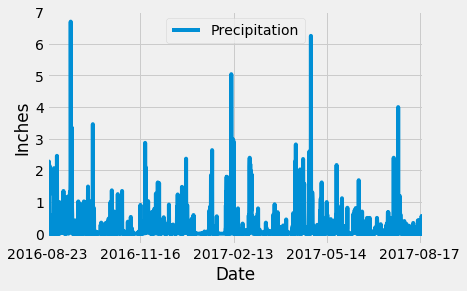

In [148]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

data = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date>='2016-08-23'", conn)
data.head(25)

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = data.set_index(['date'])
#measurement_df.head()

# Sort the dataframe by date
measurement_df = measurement_df.sort_values(by=['date'])

#Drop the NAN from the dataframe
measurement_df = measurement_df.dropna()

#Rename prcp to Precipitation
measurement_df = measurement_df.rename(columns={"prcp": "Precipitation"})

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.reset_index().plot(x='date', y='Precipitation')

# Give our graph axis labels
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='best')

plt.show()

In [157]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(measurement_df['Precipitation'])
print(f"The mean precipitation is {mean_numpy}")

median_numpy = np.median(measurement_df['Precipitation'])
print(f"The median precipitation is {median_numpy}")

mode_scipy = sts.mode(measurement_df['Precipitation'])
print(f"The mode precipitation is {mode_scipy}")


The mean precipitation is 0.17727857496288899
The median precipitation is 0.02
The mode precipitation is ModeResult(mode=array([0.]), count=array([874]))


In [159]:
# Demonstrate calculating the variance and standard deviation
var_numpy = np.var(measurement_df['Precipitation'],ddof = 0)
print(f"The precipitation variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(measurement_df['Precipitation'],ddof = 0)
print(f"The precipitation standard deviation using the NumPy module is {sd_numpy}")

The precipitation variance using the NumPy module is 0.21259051566664733
The precipitation standard deviation using the NumPy module is 0.4610753904370166


In [183]:
# Design a query to show how many stations are available in this dataset?
station_data.count()
#OR
pd.read_sql("SELECT COUNT(station) FROM Station", conn)

,COUNT(station)
0,9


In [182]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pd.read_sql("SELECT station, COUNT(tobs) AS Count FROM Measurement GROUP BY station ORDER BY Count DESC;", conn)

,station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [226]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

calculate_temp = pd.read_sql("SELECT MIN(tobs) AS 'Lowest Temp', MAX(tobs) AS 'Highest Temp', AVG(tobs) AS 'Average Temp' FROM Measurement WHERE station='USC00519281';", conn)

calculate_temp

,Lowest Temp,Highest Temp,Average Temp
0,54.0,85.0,71.663781


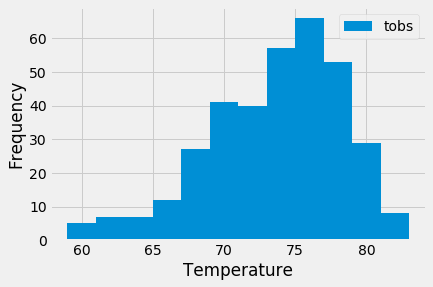

In [238]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
temp_data = pd.read_sql("SELECT tobs, station FROM Measurement WHERE station='USC00519281' AND date>='2016-08-23'", conn)
temp_data.head()

#Plot the results as a histogram
plt.hist(temp_data['tobs'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
